# SCRIPT (C)

## Objetivo:
Este script tem como intuito realizar a leitura e tratamento dos dados da carteira de cliente advindos do sistema interno de gerenciamento da empresa. Informações cadastrais de cliente e dados privados de transações de compras as quais estes clientes participaram serão agrupados, interpretados e enriquecido com informações da RFB, tal como o endereço, tempo de existência da empresa, situação da empresa; e adesão ou não ao regime de tributação SIMPLES NACIONAL.

## Bibliotecas usadas:

In [1]:
#Importação das bibliotecas utilizadas 
from pathlib import Path
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Diretórios e Repositórios dos dados

In [2]:
# Endereço onde serão salvos os arquivos adquiridos no portal da RFB.
input_files = Path('C:/Users/rapha/Documents/Python_Scripts/TCC/Dados_RFB')

### DADOS DE CLIENTES E TRANSAÇÕES DE VENDAS ###

analysis_files = Path('C:/Users/rapha/Documents/Python_Scripts/TCC/Dados_Cliente')

# DADOS DA CARTEIRA DE CLIENTES

## O conjuntos de dados inclui informações sobre:

Cada registro representa um cliente. 

### ANTES

0. cod_Cliente: Código que identifica o Cliente;
1. cnpj_basico: Número base de inscrição no CNPJ (oito primeiros dígitos do CNPJ);
2. cnpj_ordem: Número do Estabelecimento de inscrição no CNPJ (do nono até o décimo segundo dígito do CNPJ);
3. cnpj_dv:Dígito Verificador do número de inscrição no CNPJ (Dois últimos dígitos do CNPJ);
4. cidade: Cidade do Cliente;
5. estado: Estado do Cliente;
6. bairro: Bairro do Cliente;
7. cep: CEP do Cliente;
8. logradouro: Logradouro do Cliente;
9. cnae: Código da atividade economica principal;
10. cod_cidade: Código da Cidade segundo o IBGE;

### DEPOIS

0. cod_Cliente: Código que identifica o Cliente;
1. cnpj_basico: Número base de inscrição no CNPJ (oito primeiros dígitos do CNPJ);
2. cnpj_ordem: Número do Estabelecimento de inscrição no CNPJ (do nono até o décimo segundo dígito do CNPJ);
3. cnpj_dv:Dígito Verificador do número de inscrição no CNPJ (Dois últimos dígitos do CNPJ);

In [3]:
# Leitura da base de cientes
#Selecionando apenas as colunas que serão utilizadas no projeto.

clientes = pd.read_csv(filepath_or_buffer = (str(Path(f'{analysis_files}' + '/' + 'Carteira_Clientes.csv'))),
                       sep = ';',
                       engine = 'python',
                       encoding = 'utf-8',
                       usecols = [0,2,3,4])
clientes.head()

,cod_cliente,cnpj_basico,cnpj_ordem,cnpj_dv
0,3137,37575240,1,24
1,2681,30220714,1,76
2,652,4972092,60,82
3,1328,24971040,1,49
4,843,20445811,1,3


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cod_cliente  2735 non-null   int64
 1   cnpj_basico  2735 non-null   int64
 2   cnpj_ordem   2735 non-null   int64
 3   cnpj_dv      2735 non-null   int64
dtypes: int64(4)
memory usage: 85.6 KB


In [5]:
#Identificando a presença de dados faltantes:
clientes.isna().sum()

cod_cliente    0
cnpj_basico    0
cnpj_ordem     0
cnpj_dv        0
dtype: int64

# DADOS DAS TRANSAÇÕES DE VENDAS

## O conjuntos de dados inclui informações sobre:

Cada registro representa uma transação de venda. Um cliente pode ter n transações de vendas.

### ANTES

0. Cod_Clientes: Código que identifica o Cliente;
1. Faturado: 0 para compras canceladas e 1 para comprar concluidas;
2. SetorAtendimento: Informa qual setor foi o responsável pela transação;
3. Emissão: Data em que a transação foi iniciada;
4. Saida: Data em que a transação foi encerrada;
5. CodProdut: Código da mercadoria comercializada;
6. Valor_prod: Valor de venda da mercadoria comercializada;
7. Qtd: Número de itens comercializados na respectiva transação;
8. Ganho: Valor faturado por transação;

### DEPOIS

0. Cod_Clientes: Código que identifica o Cliente;
1. Faturado_cancel: Quantidades de compras canceladas para dado cliente;
2. Faturado_concluid: Quantidades de compras concluidas para dado cliente;
3. Qtd: Quantidade média de produtos negociados para dado cliente;
4. valor_comprado:Valor média faturado em negociações para dado cliente;
5. Interv_Transacao: Média de dias entre cada transação para dado cliente;
6. duracao_transacao: Intervalo médio em dias da duração das transações para dado cliente;
7. evasao: Clientes que evadiram.

In [6]:
# Leitura da base de Transações de vendas
transacoes = pd.read_csv(filepath_or_buffer = (str(Path(f'{analysis_files}' + '/' + 'TransacoesVenda.csv'))),
                       sep = ';',
                       engine = 'python',
                       encoding = 'utf-8')
transacoes.head()

,CodClientes,Faturado,SetorAtendim,Emissao,Saida,Transacao,CodProdut,Valor_prod,Qtd,Ganho
0,3110,S,5,20190128,20190128,37900,133,50.2,35,1757.0
1,3110,S,1,20190422,20190423,42269,87,60.3,32,1929.6
2,3110,S,5,20190523,20190526,43847,107,45.3,39,1766.7
3,3110,S,6,20190904,20190907,49157,69,38.9,13,505.7
4,3110,S,2,20191111,20191114,52620,65,47.6,51,2427.6


In [7]:
#Checando os tipos de valores:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47249 entries, 0 to 47248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodClientes   47249 non-null  int64  
 1   Faturado      47249 non-null  object 
 2   SetorAtendim  47249 non-null  int64  
 3   Emissao       47249 non-null  int64  
 4   Saida         47249 non-null  int64  
 5   Transacao     47249 non-null  int64  
 6   CodProdut     47249 non-null  int64  
 7   Valor_prod    47249 non-null  float64
 8   Qtd           47249 non-null  int64  
 9   Ganho         47249 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 3.6+ MB


In [8]:
#Checando valores duplicados:
transacoes.duplicated().sum()

0

In [9]:
#Identificando a presença de dados faltantes:
transacoes.isna().sum()

CodClientes     0
Faturado        0
SetorAtendim    0
Emissao         0
Saida           0
Transacao       0
CodProdut       0
Valor_prod      0
Qtd             0
Ganho           0
dtype: int64

## Tratamento dos dados

In [10]:
#Ajustando os campos de data:
transacoes['Emissao'] = pd.to_datetime(transacoes['Emissao'], format='%Y%m%d')
transacoes['Saida'] = pd.to_datetime(transacoes['Saida'], format='%Y%m%d')

# Conversão das labels de 'S' e 'N' para 0 e 1:
transacoes['Faturado'].replace('S', 1, inplace=True)
transacoes['Faturado'].replace('N', 0, inplace=True)

#Configuração de nova variável:
transacoes['Faturado'].astype(bool)

transacoes['Emissao_ano'] = transacoes['Emissao'].dt.year
transacoes['Emissao_mes'] = transacoes['Emissao'].dt.month
transacoes['Emissao_dia'] = transacoes['Emissao'].dt.day

transacoes.head()

,CodClientes,Faturado,SetorAtendim,Emissao,Saida,Transacao,CodProdut,Valor_prod,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia
0,3110,1,5,2019-01-28,2019-01-28,37900,133,50.2,35,1757.0,2019,1,28
1,3110,1,1,2019-04-22,2019-04-23,42269,87,60.3,32,1929.6,2019,4,22
2,3110,1,5,2019-05-23,2019-05-26,43847,107,45.3,39,1766.7,2019,5,23
3,3110,1,6,2019-09-04,2019-09-07,49157,69,38.9,13,505.7,2019,9,4
4,3110,1,2,2019-11-11,2019-11-14,52620,65,47.6,51,2427.6,2019,11,11


## AGRUPAMENTO DE DADOS DE VENDAS

## Pré-processamento dos dados de Transação de vendas:

In [11]:
#Removendo campos que não serão mais usados:
transacoes_copy = transacoes.copy(deep=True)

#Campos não significativos
transacoes_clean = transacoes_copy.drop(['Transacao', 'CodProdut','Valor_prod'], axis=1, inplace=True)

#Produção de variáveis mutuamente exclusivas
transacoes_clean = pd.get_dummies(transacoes_copy, columns = ['Faturado'])
transacoes_clean = pd.get_dummies(transacoes_clean, columns = ['SetorAtendim'])


transacoes_clean.head()

,CodClientes,Emissao,Saida,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia,Faturado_0,Faturado_1,SetorAtendim_1,SetorAtendim_2,SetorAtendim_3,SetorAtendim_4,SetorAtendim_5,SetorAtendim_6,SetorAtendim_7
0,3110,2019-01-28,2019-01-28,35,1757.0,2019,1,28,0,1,0,0,0,0,1,0,0
1,3110,2019-04-22,2019-04-23,32,1929.6,2019,4,22,0,1,1,0,0,0,0,0,0
2,3110,2019-05-23,2019-05-26,39,1766.7,2019,5,23,0,1,0,0,0,0,1,0,0
3,3110,2019-09-04,2019-09-07,13,505.7,2019,9,4,0,1,0,0,0,0,0,1,0
4,3110,2019-11-11,2019-11-14,51,2427.6,2019,11,11,0,1,0,1,0,0,0,0,0


In [12]:
#Odenamento do dataframe segundo as informações de codigo do cliente e data da emissão da NF
transacoes_clean_t = transacoes_clean.sort_values(by=['CodClientes', 'Emissao'])
transacoes_clean_t2 = transacoes_clean_t.reset_index(drop=True)
transacoes_clean_t2.head()

,CodClientes,Emissao,Saida,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia,Faturado_0,Faturado_1,SetorAtendim_1,SetorAtendim_2,SetorAtendim_3,SetorAtendim_4,SetorAtendim_5,SetorAtendim_6,SetorAtendim_7
0,1,2019-02-18,2019-02-20,61,2879.2,2019,2,18,0,1,0,0,1,0,0,0,0
1,1,2019-02-20,2019-02-21,44,761.2,2019,2,20,0,1,1,0,0,0,0,0,0
2,1,2019-03-14,2019-03-16,40,1284.0,2019,3,14,0,1,0,0,0,0,0,0,1
3,1,2019-09-19,2019-09-21,44,871.2,2019,9,19,0,1,0,1,0,0,0,0,0
4,1,2019-10-25,2019-10-27,34,618.8,2019,10,25,0,1,0,0,0,0,0,1,0


In [13]:
#Calculando o intervalo de recorrência de compras para um dado cliente.
transacoes_process = transacoes_clean_t2.copy(deep=True)

transacoes_process['Interv_Transacao']=""

i = 0
for i in range(0, (len(transacoes_process['Emissao'])-1)):
    if transacoes_process['CodClientes'][i] == transacoes_process['CodClientes'][i+1]:
        transacoes_process['Interv_Transacao'][i] = (abs(transacoes_process['Emissao'][i]-transacoes_process['Emissao'][i+1]))
    i+=1  


C:\Users\rapha\AppData\Local\Temp/ipykernel_19408/1059973138.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacoes_process['Interv_Transacao'][i] = (abs(transacoes_process['Emissao'][i]-transacoes_process['Emissao'][i+1]))


In [14]:
#Ajuste do cálculo
transacoes_process['Interv_Transacao'] = pd.to_timedelta(transacoes_process['Interv_Transacao'])
transacoes_process['Interv_Transacao'] = transacoes_process['Interv_Transacao'].dt.components.days

In [15]:
#Calculo da MÉDIA para preencher os NaN

#Cálculo da média
valormedio = transacoes_process.groupby('CodClientes').mean()
#Excluindo as colunas não importantes
valormedio.drop(['Qtd','Ganho','Emissao_ano','Emissao_mes','Emissao_dia','Faturado_0','Faturado_1','SetorAtendim_1','SetorAtendim_2','SetorAtendim_3','SetorAtendim_4','SetorAtendim_5','SetorAtendim_6','SetorAtendim_7'], axis=1, inplace=True)
#Renomenado a coluna gerada
valormediot = valormedio.rename(columns={'Interv_Transacao':'Interv_Transaca_med'})

In [16]:
#Adcionando a coluna gerada a tabela principal
transacoes_processt = pd.merge(transacoes_process,valormediot, on=['CodClientes'],how='inner')
#Preenchedo o campo NaN com o valor médio do intervalo de transação para o cliente específico.
transacoes_processt['Interv_Transacao'] = transacoes_processt['Interv_Transacao'].fillna(transacoes_processt['Interv_Transaca_med'])
# Apagando a coluna calculada após ela ter fornecido o valor desejado da média para o dado cliente.
transacoes_process = transacoes_processt.copy(deep=True)
transacoes_process.drop(['Interv_Transaca_med'], axis=1, inplace=True)

transacoes_process.head()

,CodClientes,Emissao,Saida,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia,Faturado_0,Faturado_1,SetorAtendim_1,SetorAtendim_2,SetorAtendim_3,SetorAtendim_4,SetorAtendim_5,SetorAtendim_6,SetorAtendim_7,Interv_Transacao
0,1,2019-02-18,2019-02-20,61,2879.2,2019,2,18,0,1,0,0,1,0,0,0,0,2.0
1,1,2019-02-20,2019-02-21,44,761.2,2019,2,20,0,1,1,0,0,0,0,0,0,22.0
2,1,2019-03-14,2019-03-16,40,1284.0,2019,3,14,0,1,0,0,0,0,0,0,1,189.0
3,1,2019-09-19,2019-09-21,44,871.2,2019,9,19,0,1,0,1,0,0,0,0,0,36.0
4,1,2019-10-25,2019-10-27,34,618.8,2019,10,25,0,1,0,0,0,0,0,1,0,8.0


In [17]:
#Calculando o tempo de duração até a sua conclusão ou cancelamento
transacoes_process['duracao_transacao']= abs(transacoes_process['Saida']-transacoes_process['Emissao'])
transacoes_process['duracao_transacao'] = transacoes_process['duracao_transacao'].dt.components.days

In [18]:
# Sumarizando a tabela de Transações: SOMA
transacoes_process_sum = transacoes_process.groupby('CodClientes').sum()
transacoes_process_sum.drop(['Qtd', 'Ganho','duracao_transacao','Interv_Transacao', 'Emissao_dia', 'Emissao_mes', 'Emissao_ano'], axis=1, inplace=True)
transacoes_process_sum.head()

,Faturado_0,Faturado_1,SetorAtendim_1,SetorAtendim_2,SetorAtendim_3,SetorAtendim_4,SetorAtendim_5,SetorAtendim_6,SetorAtendim_7
CodClientes,,,,,,,,,
1,0,19,3,5,3,2,3,2,1
2,0,17,1,5,3,1,1,5,1
4,2,17,3,3,7,1,1,4,0
5,1,12,0,2,3,0,1,6,1
123,0,13,2,3,3,0,1,3,1


In [19]:
# Sumarizando a tabela de Transações: MÁXIMO (Pegando o último dia de compra)
transacoes_process_max = transacoes_process.groupby('CodClientes').max()
transacoes_process_max.drop(['Faturado_1', 'Faturado_0','Saida', 'Qtd', 'Ganho','duracao_transacao','Interv_Transacao', 'Emissao_dia', 'Emissao_mes', 'Emissao_ano', 'SetorAtendim_1','SetorAtendim_2','SetorAtendim_3','SetorAtendim_4','SetorAtendim_5','SetorAtendim_6','SetorAtendim_7'], axis=1, inplace=True)
transacoes_process_max.head()

,Emissao
CodClientes,
1,2021-10-03
2,2021-10-01
4,2021-10-18
5,2021-09-10
123,2021-09-12


In [20]:
# Sumarizando a tabela de Transações: MÉDIA
transacoes_process_mean = transacoes_process.groupby('CodClientes').mean()
transacoes_process_mean.drop(['Faturado_1', 'Faturado_0', 'Emissao_dia', 'Emissao_mes', 'Emissao_ano','SetorAtendim_1','SetorAtendim_2','SetorAtendim_3','SetorAtendim_4','SetorAtendim_5','SetorAtendim_6','SetorAtendim_7'], axis=1, inplace=True)
transacoes_process_mean.head()

,Qtd,Ganho,Interv_Transacao,duracao_transacao
CodClientes,,,,
1,41.421053,1281.757895,53.222222,2.052632
2,35.764706,1672.782353,61.437500,1.647059
4,36.105263,1101.115789,54.722222,2.263158
5,42.846154,1133.846154,70.166667,1.923077
123,32.692308,1002.607692,65.083333,1.076923


In [21]:
# Sumarizando a tabela de Transações: DESVIO PADRÃO
transacoes_process_std_t = transacoes_process.groupby('CodClientes').std()
transacoes_process_std_t2 = transacoes_process_std_t.drop(['Qtd','Ganho','Emissao_ano','Emissao_mes','Emissao_dia','Faturado_0','Faturado_1','SetorAtendim_1','SetorAtendim_2','SetorAtendim_3','SetorAtendim_4','SetorAtendim_5','SetorAtendim_6','SetorAtendim_7','duracao_transacao'], axis=1)
transacoes_process_std = transacoes_process_std_t2.rename(columns={'Interv_Transacao':'Interv_Transacao_std'})
transacoes_process_std.head()

,Interv_Transacao_std
CodClientes,
1,65.348260
2,44.557503
4,53.504730
5,88.791735
123,66.698898


In [22]:
#Finalizando a contrução da tabela
transacoes_process_group1 = pd.merge(transacoes_process_sum,transacoes_process_max, on=['CodClientes'],how='inner')
transacoes_process_group2 = pd.merge(transacoes_process_group1,transacoes_process_mean, on=['CodClientes'],how='inner')
transacoes_process_group = pd.merge(transacoes_process_group2,transacoes_process_std, on=['CodClientes'],how='inner')

# Readequação dos nomes dos campos
transacoes_edit = transacoes_process_group.rename(columns={'Emissao':'ultima_compra', 'Ganho': 'valor_comprado', 'Faturado_1': 'faturam_concluid', 'Faturado_0': 'faturam_cancel','SetorAtendim_1':'ST1','SetorAtendim_2':'ST2','SetorAtendim_3':'ST3','SetorAtendim_4':'ST4','SetorAtendim_5':'ST5','SetorAtendim_6':'ST6','SetorAtendim_7':'ST7'})

#Destrinchando campo para facilitar interpretação
transacoes_edit['ultima_compra_ano'] = transacoes_edit['ultima_compra'].dt.year
transacoes_edit['ultima_compra_mes'] = transacoes_edit['ultima_compra'].dt.month
transacoes_edit['ultima_compra_dia'] = transacoes_edit['ultima_compra'].dt.day

transacoes_edit.head()

,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ultima_compra,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia
CodClientes,,,,,,,,,,,,,,,,,,
1,0,19,3,5,3,2,3,2,1,2021-10-03,41.421053,1281.757895,53.222222,2.052632,65.348260,2021,10,3
2,0,17,1,5,3,1,1,5,1,2021-10-01,35.764706,1672.782353,61.437500,1.647059,44.557503,2021,10,1
4,2,17,3,3,7,1,1,4,0,2021-10-18,36.105263,1101.115789,54.722222,2.263158,53.504730,2021,10,18
5,1,12,0,2,3,0,1,6,1,2021-09-10,42.846154,1133.846154,70.166667,1.923077,88.791735,2021,9,10
123,0,13,2,3,3,0,1,3,1,2021-09-12,32.692308,1002.607692,65.083333,1.076923,66.698898,2021,9,12


# Calculo da Evasão:

## Se a data da ultima compra for superior ao intervalo habitual entre as transações, significa que o cliente tem tendência a evadir.

### Em outras palavras:
### O habitual é que o cliente compre em um intervalo de X dias. Se já se passaram X dias e ele não comprou significa que ele pode ter evadido.

In [23]:
#Criação da data escolhida como referência. Esta data será usada para calcular a quanto tempo o cliente está sem comprar.
# Como os dados representam as transações dos anos de 2019, 2020 e 2021, escolheu-se o ultimo dia do ano de 2021 para ser a referência.
data = pd.to_datetime(20211024, format='%Y%m%d')
transacoes_edit['janela'] = abs(transacoes_edit['ultima_compra']- data)
transacoes_edit['janela'] = transacoes_edit['janela'].dt.components.days
transacoes_edit['Interv_Transacao'] = transacoes_edit['Interv_Transacao'].astype(int)
transacoes_edit = transacoes_edit.reset_index()

In [24]:
# Calculo da evasão: 
transacoes_edit['evasao']=0

i = 1
for i in range(1, len(transacoes_edit['Interv_Transacao'])):
    if transacoes_edit['janela'][i] > transacoes_edit['Interv_Transacao'][i]:
        transacoes_edit['evasao'][i] = 1
    else:
        transacoes_edit['evasao'][i] = 0

C:\Users\rapha\AppData\Local\Temp/ipykernel_19408/2984537874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacoes_edit['evasao'][i] = 0
C:\Users\rapha\AppData\Local\Temp/ipykernel_19408/2984537874.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacoes_edit['evasao'][i] = 1


In [25]:
transacoes_edit.drop(['ultima_compra', 'janela'], axis=1, inplace=True)
transacoes_edit.head()

,CodClientes,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia,evasao
0,1,0,19,3,5,3,2,3,2,1,41.421053,1281.757895,53,2.052632,65.348260,2021,10,3,0
1,2,0,17,1,5,3,1,1,5,1,35.764706,1672.782353,61,1.647059,44.557503,2021,10,1,0
2,4,2,17,3,3,7,1,1,4,0,36.105263,1101.115789,54,2.263158,53.504730,2021,10,18,0
3,5,1,12,0,2,3,0,1,6,1,42.846154,1133.846154,70,1.923077,88.791735,2021,9,10,0
4,123,0,13,2,3,3,0,1,3,1,32.692308,1002.607692,65,1.076923,66.698898,2021,9,12,0


<AxesSubplot:xlabel='evasao', ylabel='count'>

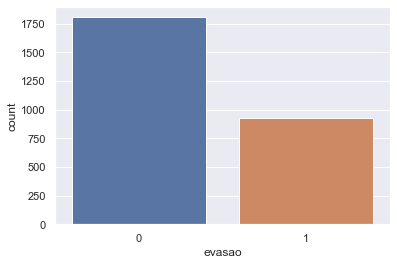

In [26]:
y=transacoes_edit['evasao'].value_counts()
sns.countplot(x=transacoes_edit['evasao'])

## Concatenando os resultados obtidos: CLIENTES + TRANSAÇAO DE VENDAS

In [27]:
clientes_edit = clientes.rename(columns={'cod_cliente':'CodClientes'})
enriquecimento_p1 = pd.merge(clientes_edit, transacoes_edit, on=['CodClientes'],how='inner')
enriquecimento_p1.head()

,CodClientes,cnpj_basico,cnpj_ordem,cnpj_dv,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,...,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia,evasao
0,3137,37575240,1,24,2,13,2,1,2,1,...,3,37.933333,1513.526667,65,2.200000,70.273809,2021,8,13,1
1,2681,30220714,1,76,4,19,3,0,5,1,...,5,33.695652,1426.056522,42,2.173913,42.887731,2021,10,6,0
2,652,4972092,60,82,0,14,1,5,3,0,...,0,37.142857,1096.257143,47,2.142857,59.139290,2020,12,10,1
3,1328,24971040,1,49,0,23,9,4,4,2,...,1,28.826087,1421.678261,43,1.826087,43.724343,2021,10,5,0
4,843,20445811,1,3,3,15,3,1,3,2,...,0,37.722222,770.738889,55,1.833333,53.230842,2021,9,29,0


In [28]:
enriquecimento_p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735 entries, 0 to 2734
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CodClientes           2735 non-null   int64  
 1   cnpj_basico           2735 non-null   int64  
 2   cnpj_ordem            2735 non-null   int64  
 3   cnpj_dv               2735 non-null   int64  
 4   faturam_cancel        2735 non-null   uint8  
 5   faturam_concluid      2735 non-null   uint8  
 6   ST1                   2735 non-null   uint8  
 7   ST2                   2735 non-null   uint8  
 8   ST3                   2735 non-null   uint8  
 9   ST4                   2735 non-null   uint8  
 10  ST5                   2735 non-null   uint8  
 11  ST6                   2735 non-null   uint8  
 12  ST7                   2735 non-null   uint8  
 13  Qtd                   2735 non-null   float64
 14  valor_comprado        2735 non-null   float64
 15  Interv_Transacao     

In [29]:
enriquecimento_p1.to_csv(Path(f'{analysis_files}' + '/' + 'enriquecimento_p1.csv'), encoding='utf=8')
print('Arquivo Salvo')

Arquivo Salvo


# Enriquecimento dos dados de clientes e transações de vendas com informações da RFB

In [30]:
# Leitura da base de CNPJ
simples_estabelecimento = pd.read_csv(filepath_or_buffer = (str(Path(f'{input_files}' + '/' + 'simples_estabelecimento.csv'))),
                       sep = ';',
                       engine = 'python',
                       encoding = 'utf-8')

In [31]:
# Merge para junção dos dados de CNPJ e clientes
enriquecimento = pd.merge(simples_estabelecimento,enriquecimento_p1, on=['cnpj_basico','cnpj_basico','cnpj_ordem','cnpj_ordem','cnpj_dv','cnpj_dv'],how='inner')
enriquecimento.head()

,index,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,Situacao_Cadastral,data_inicio_atividade,uf,municipio,opcao_pelo_simples,...,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia,evasao
0,249,3502936,1,9,1,2,19991105,DF,9701,0,...,0,39.071429,1278.350000,73,1.928571,86.897954,2021,9,20,0
1,250,3504618,1,87,1,2,19991116,DF,9701,0,...,2,30.695652,877.456522,39,1.782609,37.122869,2021,6,2,1
2,646,741629,1,92,1,2,19840322,DF,9701,1,...,3,32.650000,1367.650000,49,1.700000,49.901010,2021,8,23,1
3,831,6098111,1,69,1,2,20040116,DF,9701,0,...,1,17.888889,744.633333,84,0.777778,39.946644,2021,1,19,1
4,919,47508411,950,9,0,2,19980212,DF,9701,0,...,0,37.250000,1411.812500,66,1.687500,63.728033,2021,10,24,0


In [32]:
#Consertando as datas
enriquecimento['data_inicio_atividade'] = pd.to_datetime(enriquecimento['data_inicio_atividade'], format='%Y%m%d')

In [33]:
#Note que alguns registros não foram contemplados no merge. Isto pode ter sido motivado por alguns fatores, são eles
#Dados errados na base de cliente; CNPJ não são do DF; 
enriquecimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 2608
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        2609 non-null   int64         
 1   cnpj_basico                  2609 non-null   int64         
 2   cnpj_ordem                   2609 non-null   int64         
 3   cnpj_dv                      2609 non-null   int64         
 4   identificador_matriz_filial  2609 non-null   int64         
 5   Situacao_Cadastral           2609 non-null   int64         
 6   data_inicio_atividade        2609 non-null   datetime64[ns]
 7   uf                           2609 non-null   object        
 8   municipio                    2609 non-null   int64         
 9   opcao_pelo_simples           2609 non-null   int64         
 10  opcao_mei                    2609 non-null   int64         
 11  CodClientes                  2609 non-null 

In [34]:
#Criando a coluna Tempo_Existencia para ajudar na caracterização do cliente:
enriquecimento['tempo_existencia'] = abs(enriquecimento['data_inicio_atividade'].dt.year - 2021)
enriquecimento.head()

,index,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,Situacao_Cadastral,data_inicio_atividade,uf,municipio,opcao_pelo_simples,...,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia,evasao,tempo_existencia
0,249,3502936,1,9,1,2,1999-11-05,DF,9701,0,...,39.071429,1278.350000,73,1.928571,86.897954,2021,9,20,0,22
1,250,3504618,1,87,1,2,1999-11-16,DF,9701,0,...,30.695652,877.456522,39,1.782609,37.122869,2021,6,2,1,22
2,646,741629,1,92,1,2,1984-03-22,DF,9701,1,...,32.650000,1367.650000,49,1.700000,49.901010,2021,8,23,1,37
3,831,6098111,1,69,1,2,2004-01-16,DF,9701,0,...,17.888889,744.633333,84,0.777778,39.946644,2021,1,19,1,17
4,919,47508411,950,9,0,2,1998-02-12,DF,9701,0,...,37.250000,1411.812500,66,1.687500,63.728033,2021,10,24,0,23


In [35]:
#Criação do arquivo CSV
filepath = (str(Path(f'{input_files}' + '/' + 'enriquecimento.csv'))) 
enriquecimento.to_csv(path_or_buf=filepath, sep=';', na_rep='', header=True, index=True, index_label='index', encoding='utf-8')  

# EXPLORAÇÃO E ANÁLISE DOS DADOS:

## Perfil dos Clientes:

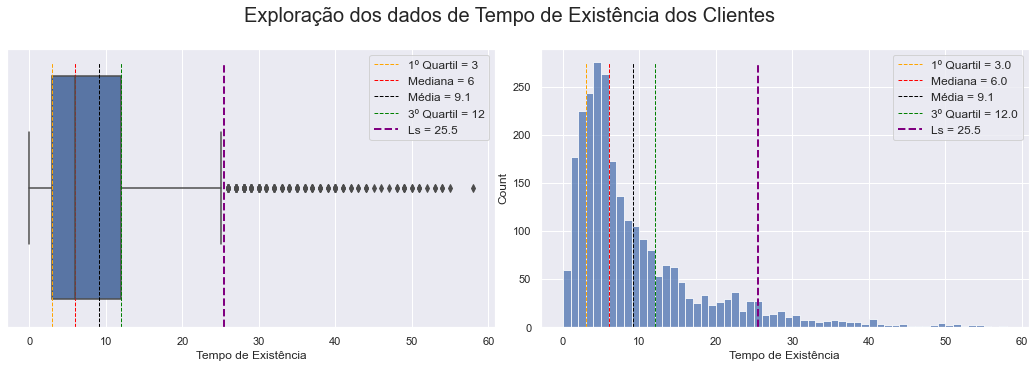

In [36]:
matriz, grafico = plt.subplots(ncols=2, figsize=(15,5))
matriz.suptitle("Exploração dos dados de Tempo de Existência dos Clientes", size = 20)
plt.tight_layout()

#----------------------------------------------------
q1 = np.percentile(enriquecimento['tempo_existencia'], 25)
q2 = np.percentile(enriquecimento['tempo_existencia'], 50)
q3 = np.percentile(enriquecimento['tempo_existencia'], 75)
mean = round(enriquecimento['tempo_existencia'].mean(),2)
LimitSup = q3 + (1.5*(q3-q1))
#----------------------------------------------------

sns.boxplot(x='tempo_existencia',
            y=None,
            hue=None,
            data=enriquecimento,
            orient='h',
            ax = grafico[0])

grafico[0].set_xlabel("Tempo de Existência")

grafico[0].axvline(q1, color='orange', ls='--', label='1º Quartil = 3', ymin = 0, ymax = 0.95, linewidth=1)
grafico[0].axvline(q2, color='red', ls='--', label='Mediana = 6', ymin = 0, ymax = 0.95, linewidth=1)
grafico[0].axvline(mean, color='black', ls='--', label=('Média = '+ (str(mean))), ymin = 0, ymax = 0.95, linewidth=1)
grafico[0].axvline(q3, color='green', ls='--', label='3º Quartil = 12', ymin = 0, ymax = 0.95, linewidth=1)
grafico[0].axvline(LimitSup, color='purple', ls='--', label=('Ls = '+ (str(LimitSup))), ymin = 0, ymax = 0.95, linewidth=2 )

grafico[0].legend(fontsize=12)

#----------------------------------------------------

sns.histplot(data=enriquecimento,
            x='tempo_existencia',
            bins=enriquecimento['tempo_existencia'].max(),
            ax=grafico[1])
            
grafico[1].set_xlabel("Tempo de Existência")

grafico[1].axvline(q1, color='orange', ls='--', label='1º Quartil = '+ (str(q1)), ymin = 0, ymax = 0.95, linewidth=1)
grafico[1].axvline(q2, color='red', ls='--', label='Mediana = '+ (str(q2)), ymin = 0, ymax = 0.95, linewidth=1)
grafico[1].axvline(mean, color='black', ls='--', label=('Média = '+ (str(mean))), ymin = 0, ymax = 0.95, linewidth=1)
grafico[1].axvline(q3, color='green', ls='--', label='3º Quartil = '+ (str(q3)), ymin = 0, ymax = 0.95, linewidth=1)
grafico[1].axvline(LimitSup, color='purple', ls='--', label=('Ls = '+ (str(LimitSup))), ymin = 0, ymax = 0.95, linewidth=2 )

grafico[1].legend(fontsize=12)



In [37]:
enriquecimento['tempo_existencia'].describe()

count    2609.000000
mean        9.095822
std         8.960891
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max        58.000000
Name: tempo_existencia, dtype: float64

In [38]:
from collections import Counter
c = Counter(enriquecimento['tempo_existencia']>=25)
print(c)

Counter({False: 2419, True: 190})


In [39]:
from collections import Counter
c = Counter(enriquecimento['data_inicio_atividade']>='2009-01-01')
print(c)

Counter({True: 1996, False: 613})


In [40]:
def rotulagem(select_grafico):
    for i in select_grafico.patches:
        select_grafico.annotate(i.get_height(),
                        (i.get_x() + i.get_width() / 2, i.get_height()),
                        ha='center', va='baseline', fontsize=12,
                        color='black', xytext=(0,1),
                        textcoords='offset points')

In [41]:
#Situacao_Cadastral: 
#1 – nula: As companhias ou suas filiais que têm características duvidosas são enquadradas como situação cadastral nula. Pode ser um caso de duplicidade de inscrição municipal ou estadual, desobrigação de ter esse número ou a constatação de ações ilícitas no ato de registro.
#2 – ativa: O negócio está regularizado e não existem pendências.
#3 – suspensa: O CNPJ apresenta algum problema, como a matriz ou a filial tem domicílio no exterior, deixou de cumprir as obrigações, há inconsistência nos dados ou indícios de fraudes. É preciso investigar e ter atenção.
#4 – inapta: As empresas que deixam de apresentar demonstrativos e declarações contábeis por dois anos consecutivos são enquadradas nessa classificação. Alguns exemplos desses documentos são: escrituração contábil digital, declaração de créditos e débitos tributários, declaração simplificada de pessoa jurídica etc.
#8 – baixada: A empresa que tem sua inscrição no CNPJ baixada é aquela que fez essa solicitação a conceder de ofício ou ao órgão competente. Pode ser feita a reativação, se o funcionamento do negócio for constatado.


Text(0, 0.5, 'Número de Clientes')

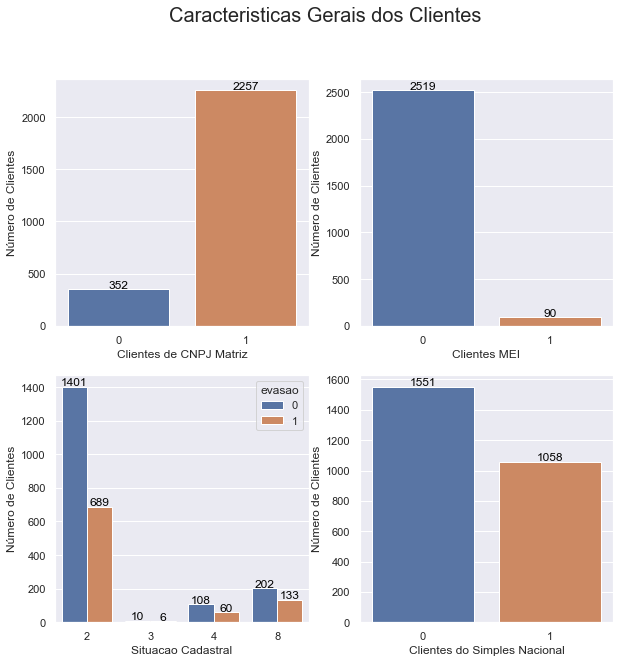

In [42]:
matrizB, figuraB = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
matrizB.suptitle("Caracteristicas Gerais dos Clientes",size = 20)

# Número de clientes que são matriz segundo a RFB
plot5 = sns.countplot(x=enriquecimento['identificador_matriz_filial'],
              data=enriquecimento,
              ax=figuraB[0][0]); 

rotulagem(plot5)

figuraB[0][0].set_xlabel("Clientes de CNPJ Matriz")
figuraB[0][0].set_ylabel("Número de Clientes")



# Quantidade de clientes que optaram pelo MEI segundo a RFB
plot6 = sns.countplot(x=enriquecimento['opcao_mei'],
              data=enriquecimento,
              ax=figuraB[0][1]);

rotulagem(plot6)

figuraB[0][1].set_xlabel("Clientes MEI")
figuraB[0][1].set_ylabel("Número de Clientes")



# Situação dos clientes segundo a RFB
plot7 = sns.countplot(hue="evasao",
                      x='Situacao_Cadastral',
                      data=enriquecimento,
                      ax=figuraB[1][0]);

rotulagem(plot7)

figuraB[1][0].set_xlabel("Situacao Cadastral")
figuraB[1][0].set_ylabel("Número de Clientes")



# Quantidade de clientes que evadiram
plot8 = sns.countplot(x=enriquecimento['opcao_pelo_simples'],
              data=enriquecimento,
              ax=figuraB[1][1]);

rotulagem(plot8)

figuraB[1][1].set_xlabel("Clientes do Simples Nacional")
figuraB[1][1].set_ylabel("Número de Clientes")

Text(0, 0.5, 'Valor Médio Comprado')

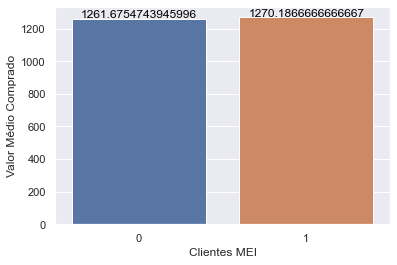

In [43]:
#Valor médio comprado por Cliente
r=sns.barplot(x=(enriquecimento['opcao_mei']),
              y=round(enriquecimento['valor_comprado'],2),
              data=enriquecimento,
             ci= None)

rotulagem(r)

r.set_xlabel("Clientes MEI")
r.set_ylabel("Valor Médio Comprado")

In [44]:
enriquecimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 2608
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        2609 non-null   int64         
 1   cnpj_basico                  2609 non-null   int64         
 2   cnpj_ordem                   2609 non-null   int64         
 3   cnpj_dv                      2609 non-null   int64         
 4   identificador_matriz_filial  2609 non-null   int64         
 5   Situacao_Cadastral           2609 non-null   int64         
 6   data_inicio_atividade        2609 non-null   datetime64[ns]
 7   uf                           2609 non-null   object        
 8   municipio                    2609 non-null   int64         
 9   opcao_pelo_simples           2609 non-null   int64         
 10  opcao_mei                    2609 non-null   int64         
 11  CodClientes                  2609 non-null 

## Perfil das Vendas:

# Ser atendido por um setor específico influencia na chance da transação ser cancelada?



Text(0, 0.5, 'Nº Transações')

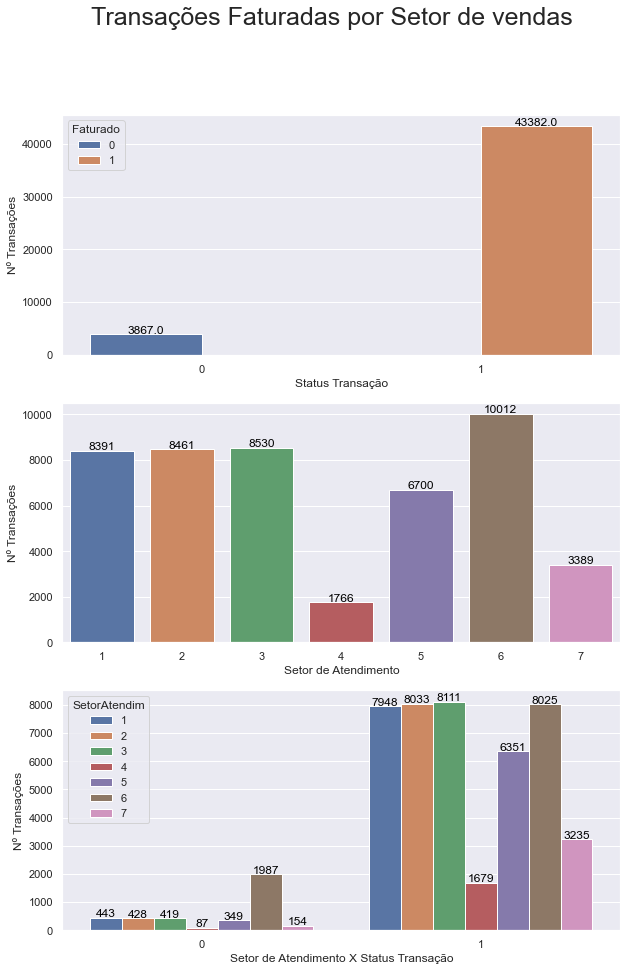

In [45]:
matrizC, figuraC = plt.subplots(3, figsize=(10,15))
matrizC.suptitle("Transações Faturadas por Setor de vendas",size = 25)

# Número de transações faturadas e canceladas
plot1 = sns.countplot(x=transacoes['Faturado'],
             hue = transacoes['Faturado'],
             data=transacoes,
             ax=figuraC[0]);

rotulagem(plot1)

figuraC[0].set_xlabel("Status Transação")
figuraC[0].set_ylabel("Nº Transações")

# Número de transações totais por setor de atendimento
plot2 = sns.countplot(x=transacoes['SetorAtendim'],
              data=transacoes,
              ax=figuraC[1]);

rotulagem(plot2)

figuraC[1].set_xlabel("Setor de Atendimento")
figuraC[1].set_ylabel("Nº Transações")

# Número de transações faturadas e canceladas por setor de atendimento
plot3 = sns.countplot(x=transacoes['Faturado'],
              hue = transacoes['SetorAtendim'],
              data=transacoes,
              ax=figuraC[2]);

rotulagem(plot3)

figuraC[2].set_xlabel("Setor de Atendimento X Status Transação")
figuraC[2].set_ylabel("Nº Transações")

In [46]:
#Calculando o tempo de duração até a sua conclusão ou cancelamento
transacoes_temp = transacoes.copy(deep=True)
transacoes_temp['duracao_transacao']= abs(transacoes['Saida']-transacoes['Emissao'])
transacoes_temp['duracao_transacao'] = transacoes_temp['duracao_transacao'].dt.components.days
transacoes_temp.head()

,CodClientes,Faturado,SetorAtendim,Emissao,Saida,Transacao,CodProdut,Valor_prod,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia,duracao_transacao
0,3110,1,5,2019-01-28,2019-01-28,37900,133,50.2,35,1757.0,2019,1,28,0
1,3110,1,1,2019-04-22,2019-04-23,42269,87,60.3,32,1929.6,2019,4,22,1
2,3110,1,5,2019-05-23,2019-05-26,43847,107,45.3,39,1766.7,2019,5,23,3
3,3110,1,6,2019-09-04,2019-09-07,49157,69,38.9,13,505.7,2019,9,4,3
4,3110,1,2,2019-11-11,2019-11-14,52620,65,47.6,51,2427.6,2019,11,11,3


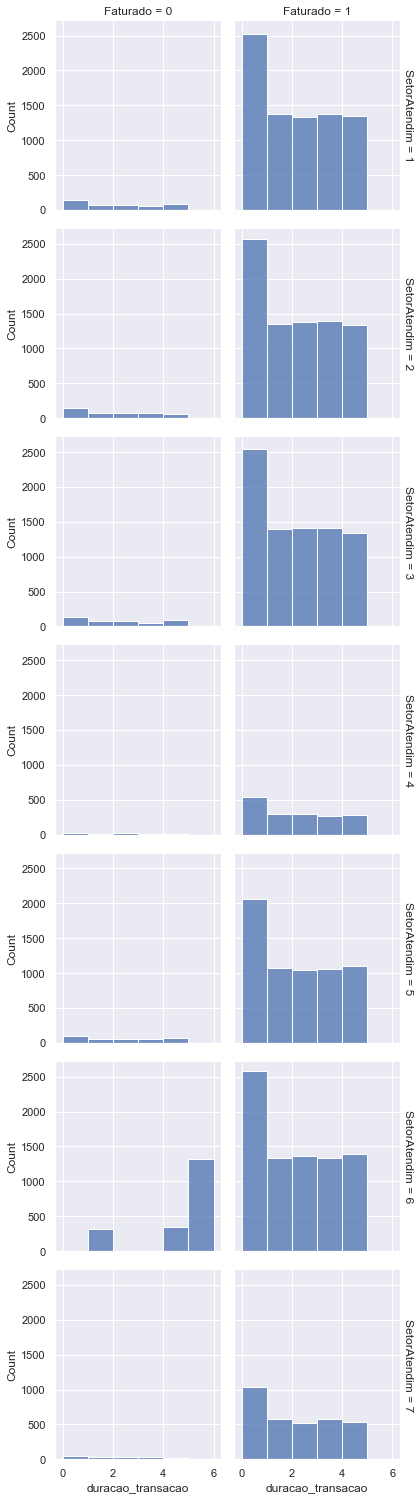

In [47]:
#Qual a relação entre faturas fechadas e cancelas por setor de atendiemento? se um cliente é atendido por um certo setor a probabilidde dele sair é maior?

#Velocidade de transação faturadas e não faturadas por setor de atenidmento;
sns.displot(
    data=transacoes_temp,
    x="duracao_transacao",
    col="Faturado",
    row="SetorAtendim",
    binwidth=1,
    height=3,
    facet_kws=dict(margin_titles=True)
)

Text(0, 0.5, 'Nº Transações')

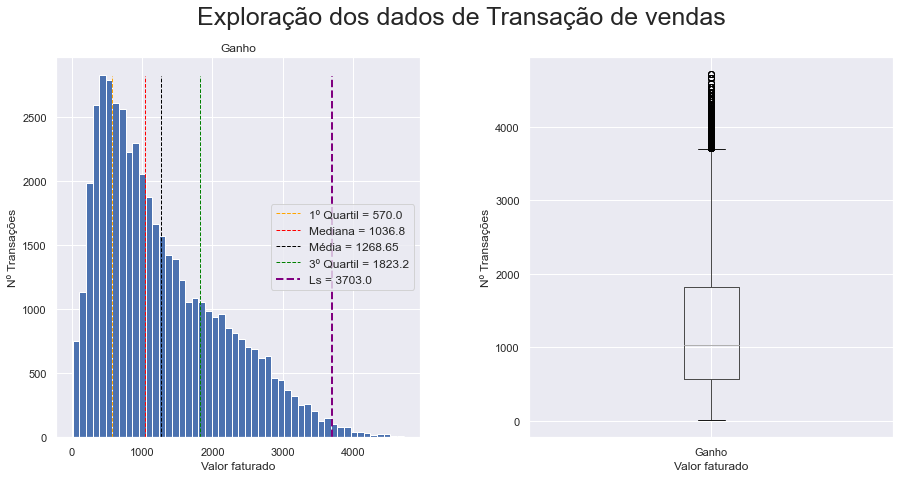

In [48]:
MatrizD, figuraD = plt.subplots(1,2, figsize=(15,7))
MatrizD.suptitle("Exploração dos dados de Transação de vendas",size = 25)

#----------------------------------------------------
q1 = np.percentile(transacoes['Ganho'], 25)
q2 = np.percentile(transacoes['Ganho'], 50)
q3 = np.percentile(transacoes['Ganho'], 75)
mean = round(transacoes['Ganho'].mean(),2)
LimitSup = q3 + (1.5*(q3-q1))
#----------------------------------------------------

#
transacoes.hist(column='Ganho',
                bins=50,
                ax=figuraD[0])

figuraD[0].set_xlabel("Valor faturado")
figuraD[0].set_ylabel("Nº Transações")

figuraD[0].axvline(q1, color='orange', ls='--', label='1º Quartil = '+ (str(q1)), ymin = 0, ymax = 0.95, linewidth=1)
figuraD[0].axvline(q2, color='red', ls='--', label='Mediana = '+ (str(q2)), ymin = 0, ymax = 0.95, linewidth=1)
figuraD[0].axvline(mean, color='black', ls='--', label=('Média = '+ (str(mean))), ymin = 0, ymax = 0.95, linewidth=1)
figuraD[0].axvline(q3, color='green', ls='--', label='3º Quartil = '+ (str(q3)), ymin = 0, ymax = 0.95, linewidth=1)
figuraD[0].axvline(LimitSup, color='purple', ls='--', label=('Ls = '+ (str(LimitSup))), ymin = 0, ymax = 0.95, linewidth=2 )

figuraD[0].legend(fontsize=12)


#
transacoes.boxplot(column=['Ganho'],
                   ax=figuraD[1])



figuraD[1].set_xlabel("Valor faturado")
figuraD[1].set_ylabel("Nº Transações")

In [49]:
transacoes['Ganho'].describe()

count    47249.000000
mean      1268.649239
std        877.432452
min         13.300000
25%        570.000000
50%       1036.800000
75%       1823.200000
max       4716.300000
Name: Ganho, dtype: float64

Text(0, 0.5, 'Nº Transações')

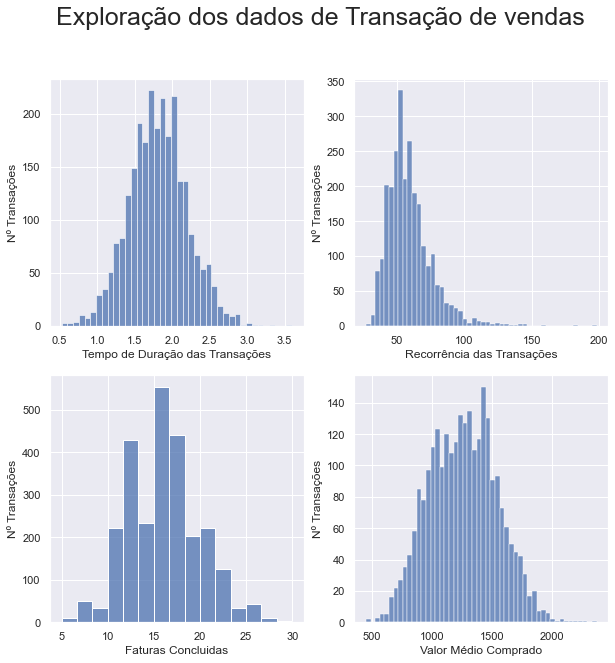

In [50]:
MatrizF, figuraF = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
MatrizF.suptitle("Exploração dos dados de Transação de vendas",size = 25)


sns.histplot(data=enriquecimento,
             x ='duracao_transacao',
             bins=40,
             ax=figuraF[0][0])

figuraF[0][0].set_xlabel("Tempo de Duração das Transações")
figuraF[0][0].set_ylabel("Nº Transações")


sns.histplot(data=enriquecimento,
             x='Interv_Transacao',
             bins=50,
             ax=figuraF[0][1])

figuraF[0][1].set_xlabel("Recorrência das Transações")
figuraF[0][1].set_ylabel("Nº Transações")

sns.histplot(data=enriquecimento,
             x='faturam_concluid',
             bins=15,
             ax=figuraF[1][0])

figuraF[1][0].set_xlabel("Faturas Concluidas")
figuraF[1][0].set_ylabel("Nº Transações")

sns.histplot(data=enriquecimento,
             bins=50,
             x='valor_comprado',
             ax=figuraF[1][1])

figuraF[1][1].set_xlabel("Valor Médio Comprado")
figuraF[1][1].set_ylabel("Nº Transações")

In [51]:
#Existe relação entre o numero de faturas canceladas e a duração das transações?
#empresas com menos de 8 anos e existencia tendem a cancelar em média  um maior numero de  transações
#Empresas mais novas cancelam mais as compras? sim

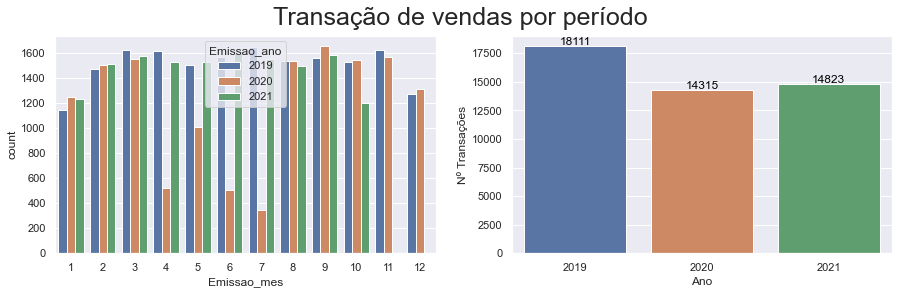

In [52]:
#Quais são os meses onde há mais transações?
#Os meses de maior e menor numero de transaçõessão respectivamente: Dezembro e Fevereiro

MatrizE, figuraE = plt.subplots(nrows = 1, ncols = 2, figsize=(15,4))
MatrizE.suptitle("Transação de vendas por período",size = 25)

#
grafico_mes = sns.countplot(x='Emissao_mes',
                            data=transacoes,
                            hue='Emissao_ano',
                            ax=figuraE[0])

figuraE[1].set_xlabel("Mês")
figuraE[1].set_ylabel("Nº Transações")

#
grafico_ano = sns.countplot(x='Emissao_ano',
                            data=transacoes,
                            ax=figuraE[1])

figuraE[1].set_xlabel("Ano")
figuraE[1].set_ylabel("Nº Transações")

rotulagem(grafico_ano)

In [53]:
#As transações duram em média x dias;
filtered_df = transacoes_temp[transacoes_temp.Faturado.isin([0,1])]
filtered_df['duracao_transacao'].describe()

count    47249.000000
mean         1.811001
std          1.581448
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: duracao_transacao, dtype: float64

In [54]:
#As transações canceladas duraram em média x dias;
filtered_df = transacoes_temp[transacoes_temp.Faturado.isin([0])]
filtered_df['duracao_transacao'].describe()

count    3867.000000
mean        3.054823
std         2.031081
min         0.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: duracao_transacao, dtype: float64

In [55]:
#As transações faturadas duraram em média x dias;
#As transações que são fechadas duraram em média x dias;
filtered_df = transacoes_temp[transacoes_temp.Faturado.isin([1])]
filtered_df['duracao_transacao'].describe()

count    43382.000000
mean         1.700129
std          1.485288
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: duracao_transacao, dtype: float64

In [56]:
#Em média, os clientes que não evadiram apresentavam x dias como intervalo de compra;
filtered_df = enriquecimento[enriquecimento.evasao.isin([1,0])]
filtered_df['Interv_Transacao'].describe()


count    2609.000000
mean       59.281334
std        16.513467
min        27.000000
25%        48.000000
50%        56.000000
75%        67.000000
max       198.000000
Name: Interv_Transacao, dtype: float64

In [57]:
#Em média, os clientes e evadiram apresentavam x dias como intervalo de compra;
filtered_df = enriquecimento[enriquecimento.evasao.isin([0])]
filtered_df['Interv_Transacao'].describe()

count    1721.000000
mean       61.160372
std        16.824085
min        32.000000
25%        50.000000
50%        58.000000
75%        69.000000
max       198.000000
Name: Interv_Transacao, dtype: float64

In [58]:
#Em média, os clientes que não evadiram apresentavam x dias como intervalo de compra;
filtered_df = enriquecimento[enriquecimento.evasao.isin([1])]
filtered_df['Interv_Transacao'].describe()

count    888.000000
mean      55.639640
std       15.257603
min       27.000000
25%       46.000000
50%       53.000000
75%       62.000000
max      159.000000
Name: Interv_Transacao, dtype: float64

In [59]:
#Taxa de evasao
nao_evadiu=(enriquecimento[enriquecimento.evasao.isin([0])])
evadiu=(enriquecimento[enriquecimento.evasao.isin([1])])

len(nao_evadiu)/len(evadiu)

1.938063063063063

Text(0, 0.5, 'Número de Clientes')

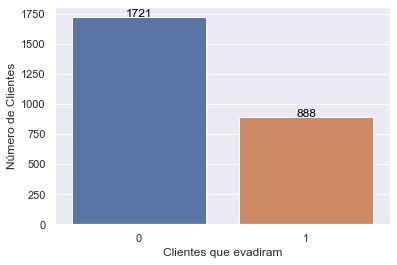

In [60]:
# Quantidade de clientes que evadiram
plot8 = sns.countplot(x=enriquecimento['evasao'],
              data=enriquecimento,
              );

rotulagem(plot8)

plot8.set_xlabel("Clientes que evadiram")
plot8.set_ylabel("Número de Clientes")

In [61]:
#a cada x transação, uma é cancelada.
cancelado=(transacoes[transacoes.Faturado.isin([0])])
faturado=(transacoes[transacoes.Faturado.isin([1])])

len(faturado)/len(cancelado)

11.218515645203

Text(0, 0.5, 'Faturamento Médio em R$')

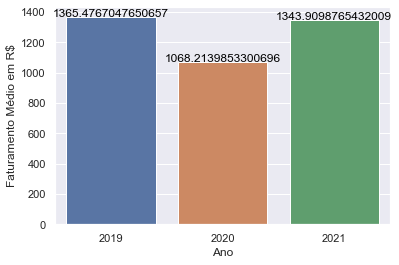

In [62]:
#Ganho médio anual
t=sns.barplot(x='Emissao_ano',
            y='Ganho',
            data=transacoes,
            ci= None)

rotulagem(t)

t.set_xlabel("Ano")
t.set_ylabel("Faturamento Médio em R$")

In [63]:
transacoes.head()

,CodClientes,Faturado,SetorAtendim,Emissao,Saida,Transacao,CodProdut,Valor_prod,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia
0,3110,1,5,2019-01-28,2019-01-28,37900,133,50.2,35,1757.0,2019,1,28
1,3110,1,1,2019-04-22,2019-04-23,42269,87,60.3,32,1929.6,2019,4,22
2,3110,1,5,2019-05-23,2019-05-26,43847,107,45.3,39,1766.7,2019,5,23
3,3110,1,6,2019-09-04,2019-09-07,49157,69,38.9,13,505.7,2019,9,4
4,3110,1,2,2019-11-11,2019-11-14,52620,65,47.6,51,2427.6,2019,11,11


In [64]:
transacoes_temp.head()

,CodClientes,Faturado,SetorAtendim,Emissao,Saida,Transacao,CodProdut,Valor_prod,Qtd,Ganho,Emissao_ano,Emissao_mes,Emissao_dia,duracao_transacao
0,3110,1,5,2019-01-28,2019-01-28,37900,133,50.2,35,1757.0,2019,1,28,0
1,3110,1,1,2019-04-22,2019-04-23,42269,87,60.3,32,1929.6,2019,4,22,1
2,3110,1,5,2019-05-23,2019-05-26,43847,107,45.3,39,1766.7,2019,5,23,3
3,3110,1,6,2019-09-04,2019-09-07,49157,69,38.9,13,505.7,2019,9,4,3
4,3110,1,2,2019-11-11,2019-11-14,52620,65,47.6,51,2427.6,2019,11,11,3


In [65]:
transacoes_edit.head()

,CodClientes,faturam_cancel,faturam_concluid,ST1,ST2,ST3,ST4,ST5,ST6,ST7,Qtd,valor_comprado,Interv_Transacao,duracao_transacao,Interv_Transacao_std,ultima_compra_ano,ultima_compra_mes,ultima_compra_dia,evasao
0,1,0,19,3,5,3,2,3,2,1,41.421053,1281.757895,53,2.052632,65.348260,2021,10,3,0
1,2,0,17,1,5,3,1,1,5,1,35.764706,1672.782353,61,1.647059,44.557503,2021,10,1,0
2,4,2,17,3,3,7,1,1,4,0,36.105263,1101.115789,54,2.263158,53.504730,2021,10,18,0
3,5,1,12,0,2,3,0,1,6,1,42.846154,1133.846154,70,1.923077,88.791735,2021,9,10,0
4,123,0,13,2,3,3,0,1,3,1,32.692308,1002.607692,65,1.076923,66.698898,2021,9,12,0


In [66]:
enriquecimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 2608
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   index                        2609 non-null   int64         
 1   cnpj_basico                  2609 non-null   int64         
 2   cnpj_ordem                   2609 non-null   int64         
 3   cnpj_dv                      2609 non-null   int64         
 4   identificador_matriz_filial  2609 non-null   int64         
 5   Situacao_Cadastral           2609 non-null   int64         
 6   data_inicio_atividade        2609 non-null   datetime64[ns]
 7   uf                           2609 non-null   object        
 8   municipio                    2609 non-null   int64         
 9   opcao_pelo_simples           2609 non-null   int64         
 10  opcao_mei                    2609 non-null   int64         
 11  CodClientes                  2609 non-null 

<AxesSubplot:xlabel='valor_comprado', ylabel='Count'>

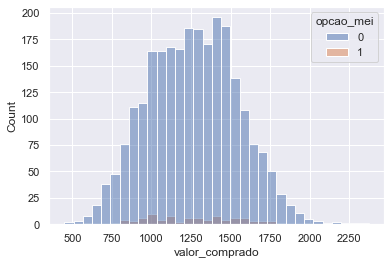

In [67]:
sns.histplot(x=(enriquecimento['valor_comprado']),
            hue=(enriquecimento['opcao_mei']),
            data=enriquecimento)


In [68]:
faturado_pelo_mei=(enriquecimento[enriquecimento.opcao_mei.isin([0])])
print(faturado_pelo_mei['valor_comprado'].sum())
print(faturado_pelo_mei['valor_comprado'].sum()/2519)

3178160.433955234
1261.6754402362978


In [69]:
faturado_pelo_n_mei=(enriquecimento[enriquecimento.opcao_mei.isin([1])])
print(faturado_pelo_n_mei['valor_comprado'].sum())
print(faturado_pelo_n_mei['valor_comprado'].sum()/90)

114316.8214036539
1270.1869044850432


Text(0, 0.5, 'Valor Médio Comprado')

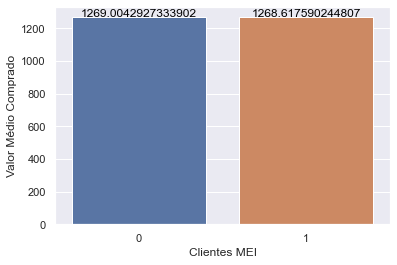

In [70]:
#Valor médio comprado por Cliente
r=sns.barplot(x=(transacoes['Faturado']),
              y=(transacoes['Ganho']),
              data=transacoes,
             ci= None)

rotulagem(r)

r.set_xlabel("Clientes MEI")
r.set_ylabel("Valor Médio Comprado")

In [71]:
faturado_transacoes=(transacoes[transacoes.Faturado.isin([1])])
faturado_transacoes['Ganho'].sum()

55035168.29999999

In [72]:
n_faturado_transacoes=(transacoes[transacoes.Faturado.isin([0])])
n_faturado_transacoes['Ganho'].sum()

4907239.6